In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint
import csv
from config import key

In [16]:
url = "https://na1.api.riotgames.com/lol/match/v4/matches/"
api_f= "api_key="

In [21]:
#csv files to work through adjust the file path to needs
#this is match data
file = "data/matchinfo.csv"

#this is a list of game ids to get data from
qfile = "data/queue.csv"
games = []
player_number = []
#reading in the game ids
queue = pd.read_csv(qfile, header = None)

#partic_data = response['participants']

#trying to create a loop to iterate through our gameids
#so that we can get more than just the one data set
queue_random = queue.sample(3)

#jsonifying the api data
for index,row in queue_random.iterrows():
    n_url = (url + str(row[0]) + "/?"+ api_f + key) 
    response = requests.get(n_url).json()
    games.append(response) 
    


In [29]:
players = games[0]["participants"]

for i in players:   
    #player_number.append(players[0]["participantId"])
    print (len(i))
"""
        plyr_Kill_Stats = { 
                "Player_Number" : players[0]["participantId"],
                "Assists" :players[0]['stats']["assists"],
                "Deaths" : players[0]['stats']["deaths"],
                "DoubleKills" : players[0]['stats']["doubleKills"],
                "Kills" : players[0]['stats']["kills"],
                "Inhibitor_Kills" : players[0]['stats']["inhibitorKills"],
                "Largest_MultiK" : players[0]['stats']["largestMultiKill"],
                "Lane" : players[0]["timeline"]["lane"],
                "Win" : int(players[0]['stats']['win']),
                }
        plyr_Dmg_Stats = {
            "Largest_Dmg_Crit" : players[0]['stats']['largestCriticalStrike'],
            "Magic_Dmg_Dealt" : players[0]['stats']["magicDamageDealt"],
            "Magic_Dmg_Dealt_2c" : players[0]['stats']["magicDamageDealtToChampions"],
            "Magic_Dmg_Taken" : players[0]['stats']["magicalDamageTaken"],
            "Magic_Dmg_Dealt" : players[0]['stats']["magicDamageDealt"],
            "Physical_Dmg_Dealt" : players[0]['stats']["physicalDamageDealt"],
            "Physical_Dmg_Dealt_2c" : players[0]['stats']["magicDamageDealtToChampions"],
            "Physical_Dmg_Taken" : players[0]['stats']["physicalDamageDealt"],
            "Total_Dmg_Dealt" : players[0]['stats']['totalDamageDealt'],
            "Total_Dmg_Dealt_2c" : players[0]['stats']['totalDamageDealtToChampions'],
            "Total_Dmg_Taken" : players[0]['stats']['totalDamageTaken'],
            "CC_Time" : players[0]['stats']['timeCCingOthers'],
            "Sight_Wards_Bought" : players[0]['stats']['sightWardsBoughtInGame'],
            "Lane" : players[0]["timeline"]["lane"],
            "Win" : int(players[0]['stats']['win']),

                    }
        
        plyr_NM_Stats = {
            "Neutral_Minions_Slain" : players[0]['stats']['neutralMinionsKilled'],
            #"NM_Enemy_Jungle" : players[0]['stats']['neutralMinionsKilledEnemyJungle'],
            #"NM_Team_Jungle" : players[0]['stats']['neutralMinionsKilledTeamJungle'],
            "Lane" : players[0]["timeline"]["lane"],
            "Win" : int(players[0]['stats']['win']),

                }
        plyr_Gold_Stats = {
            "Gold" : players[0]['stats']["goldEarned"],
            "Gold_Spent" : players[0]['stats']["goldSpent"],
            "Lane" : players[0]["timeline"]["lane"],
            "Win" : int(players[0]['stats']['win']),}   
        pprint (plyr_Kill_Stats)
"""

8
8
8
8
8
8
7
7
8
8


'\n        plyr_Kill_Stats = { \n                "Player_Number" : players[0]["participantId"],\n                "Assists" :players[0][\'stats\']["assists"],\n                "Deaths" : players[0][\'stats\']["deaths"],\n                "DoubleKills" : players[0][\'stats\']["doubleKills"],\n                "Kills" : players[0][\'stats\']["kills"],\n                "Inhibitor_Kills" : players[0][\'stats\']["inhibitorKills"],\n                "Largest_MultiK" : players[0][\'stats\']["largestMultiKill"],\n                "Lane" : players[0]["timeline"]["lane"],\n                "Win" : int(players[0][\'stats\'][\'win\']),\n                }\n        plyr_Dmg_Stats = {\n            "Largest_Dmg_Crit" : players[0][\'stats\'][\'largestCriticalStrike\'],\n            "Magic_Dmg_Dealt" : players[0][\'stats\']["magicDamageDealt"],\n            "Magic_Dmg_Dealt_2c" : players[0][\'stats\']["magicDamageDealtToChampions"],\n            "Magic_Dmg_Taken" : players[0][\'stats\']["magicalDamageTaken"],

In [11]:

    # storing our numerical data based on a singular game
    # pulling specific frames from team data to graph etc.
    # Team id 100 dictionary
    
oh_stats = {"Team" : games[0]["teams"][0]["teamId"],
        "Towers_Killed" : games[0]["teams"][0]["towerKills"],
        "Dragons_Killed" : games[0]["teams"][0]["dragonKills"],
        "First_Tower" : int(games[0]["teams"][0]["firstTower"]),
        "First_Inhibitor" : int(games[0]["teams"][0]["firstInhibitor"]),
        "First_Blood" : int(games[0]["teams"][0]["firstBlood"]),
        "Result" : games[0]["teams"][0]["win"], }                      
    # Team id 200 dictionary
th_stats = {"Team" : games[0]["teams"][1]["teamId"],
        "Towers_Killed" :  games[0]["teams"][1]["towerKills"],
        "Dragons_Killed" : games[0]["teams"][1]["dragonKills"],
        "First_Tower" : int(games[0]["teams"][1]["firstTower"]),
        "First_Inhibitor" : int(games[0]["teams"][1]["firstInhibitor"]),
        "First_Blood" : int(games[0]["teams"][1]["firstBlood"]),
        "Result" : games[0]["teams"][1]["win"],}
"""
oh_bans = {
    "teamid" : games[0]["teams"][0]["teamId"],
    "Ban 1" : games[0]["teams"][0]["bans"][0]["championId"],
    "Ban 2" : games[0]["teams"][0]["bans"][1]["championId"],
    "Ban 3" : games[0]["teams"][0]["bans"][2]["championId"],
    "Ban 4" : games[0]["teams"][0]["bans"][3]["championId"],
    "Ban 5" : games[0]["teams"][0]["bans"][4]["championId"],    
        }
th_bans = {
    "teamid" : games[0]["teams"][1]["teamId"],
    "Ban 1" : games[0]["teams"][1]["bans"][0]["championId"],
    "Ban 2" : games[0]["teams"][1]["bans"][1]["championId"],
    "Ban 3" : games[0]["teams"][1]["bans"][2]["championId"],
    "Ban 4" : games[0]["teams"][1]["bans"][3]["championId"],
    "Ban 5" : games[0]["teams"][1]["bans"][4]["championId"],
}
"""
teams_1 = pd.DataFrame([oh_stats, th_stats])
#bans = pd.DataFrame([oh_bans, th_bans])



In [12]:
pprint(games)

[{'gameCreation': 1550277294772,
  'gameDuration': 1411,
  'gameId': 2978596219,
  'gameMode': 'CLASSIC',
  'gameType': 'MATCHED_GAME',
  'gameVersion': '9.3.261.9578',
  'mapId': 11,
  'participantIdentities': [{'participantId': 1,
                             'player': {'accountId': 'ybAcwruJJAuAqZUPofjvvpfF6muiTLtIYnxc5VnTNN_ktPY',
                                        'currentAccountId': 'ybAcwruJJAuAqZUPofjvvpfF6muiTLtIYnxc5VnTNN_ktPY',
                                        'currentPlatformId': 'NA1',
                                        'matchHistoryUri': '/v1/stats/player_history/NA1/203785658',
                                        'platformId': 'NA1',
                                        'profileIcon': 3876,
                                        'summonerId': 'qlr8ZG9TUt0bO-YZ5gM0cr53tKw3g82dzC2DmYesusk-AlE',
                                        'summonerName': 'THACOMMANDER69'}},
                            {'participantId': 2,
                             'p

                              'statPerk0': 5008,
                              'statPerk1': 5002,
                              'statPerk2': 5001,
                              'timeCCingOthers': 15,
                              'totalDamageDealt': 128517,
                              'totalDamageDealtToChampions': 6251,
                              'totalDamageTaken': 14590,
                              'totalHeal': 5861,
                              'totalMinionsKilled': 29,
                              'totalPlayerScore': 0,
                              'totalScoreRank': 0,
                              'totalTimeCrowdControlDealt': 537,
                              'totalUnitsHealed': 1,
                              'tripleKills': 0,
                              'trueDamageDealt': 12969,
                              'trueDamageDealtToChampions': 479,
                              'trueDamageTaken': 144,
                              'turretKills': 2,
                    

                              'playerScore7': 0,
                              'playerScore8': 0,
                              'playerScore9': 0,
                              'quadraKills': 0,
                              'sightWardsBoughtInGame': 0,
                              'statPerk0': 5008,
                              'statPerk1': 5008,
                              'statPerk2': 5001,
                              'timeCCingOthers': 22,
                              'totalDamageDealt': 56389,
                              'totalDamageDealtToChampions': 13658,
                              'totalDamageTaken': 26252,
                              'totalHeal': 5856,
                              'totalMinionsKilled': 55,
                              'totalPlayerScore': 0,
                              'totalScoreRank': 0,
                              'totalTimeCrowdControlDealt': 120,
                              'totalUnitsHealed': 1,
                              'triple

                                                      '10-20': 578.3},
                                 'lane': 'TOP',
                                 'participantId': 1,
                                 'role': 'SOLO',
                                 'xpDiffPerMinDeltas': {'0-10': 78.8,
                                                        '10-20': 239.6},
                                 'xpPerMinDeltas': {'0-10': 458.6,
                                                    '10-20': 563.4}}},
                   {'championId': 99,
                    'participantId': 2,
                    'spell1Id': 4,
                    'spell2Id': 14,
                    'stats': {'assists': 14,
                              'champLevel': 13,
                              'combatPlayerScore': 0,
                              'damageDealtToObjectives': 2425,
                              'damageDealtToTurrets': 1346,
                              'damageSelfMitigated': 3181,
                    

                              'unrealKills': 0,
                              'visionScore': 12,
                              'visionWardsBoughtInGame': 0,
                              'wardsKilled': 0,
                              'wardsPlaced': 7,
                              'win': False},
                    'teamId': 200,
                    'timeline': {'creepsPerMinDeltas': {'0-10': 0.2,
                                                        '10-20': 1.7000000000000002},
                                 'csDiffPerMinDeltas': {'0-10': 0.1,
                                                        '10-20': 1.6},
                                 'damageTakenDiffPerMinDeltas': {'0-10': 202.20000000000002,
                                                                 '10-20': 35.19999999999999},
                                 'damageTakenPerMinDeltas': {'0-10': 617.2,
                                                             '10-20': 787.8},
                               

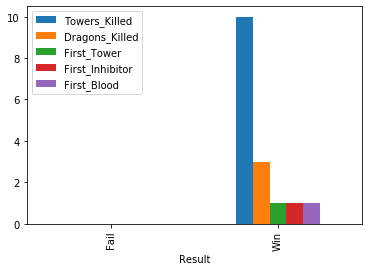

In [13]:
#group first counts on win and lose 
results = teams_1.set_index(["Result"])
results_cln = results.drop(["Team"], axis = 1)
x_axis = (len(results_cln))
results_cln.plot(kind = 'bar')
plt.show()